In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
fldLoc = '/scratch/srai6/EddyKillingPaper3/CESM/'
timeSpaceFlat = 'timeSpaceFlattenCorr.nc'
corr_2D = 'Corr2D_allEll.nc'
ds1 = Dataset(fldLoc + timeSpaceFlat)
ds2 = Dataset(fldLoc + corr_2D)

In [3]:
ell = np.array(ds1.variables['ell'])
regions = np.array(ds1.variables['region'])
corr_EPPA_NLMtot = np.array(ds1.variables['corr_EPPA_NLMtot'])
corr_EPPA_NLMrot = np.array(ds1.variables['corr_EPPA_NLMrot'])
corr_EPPA_NLMstr = np.array(ds1.variables['corr_EPPA_NLMstr'])
corr_tAvg_EPPA_NLMtot = np.array(ds1.variables['corr_tAvg_EPPA_NLMtot'])
corr_tAvg_EPPA_NLMrot = np.array(ds1.variables['corr_tAvg_EPPA_NLMrot'])
corr_tAvg_EPPA_NLMst = np.array(ds1.variables['corr_tAvg_EPPA_NLMstr'])

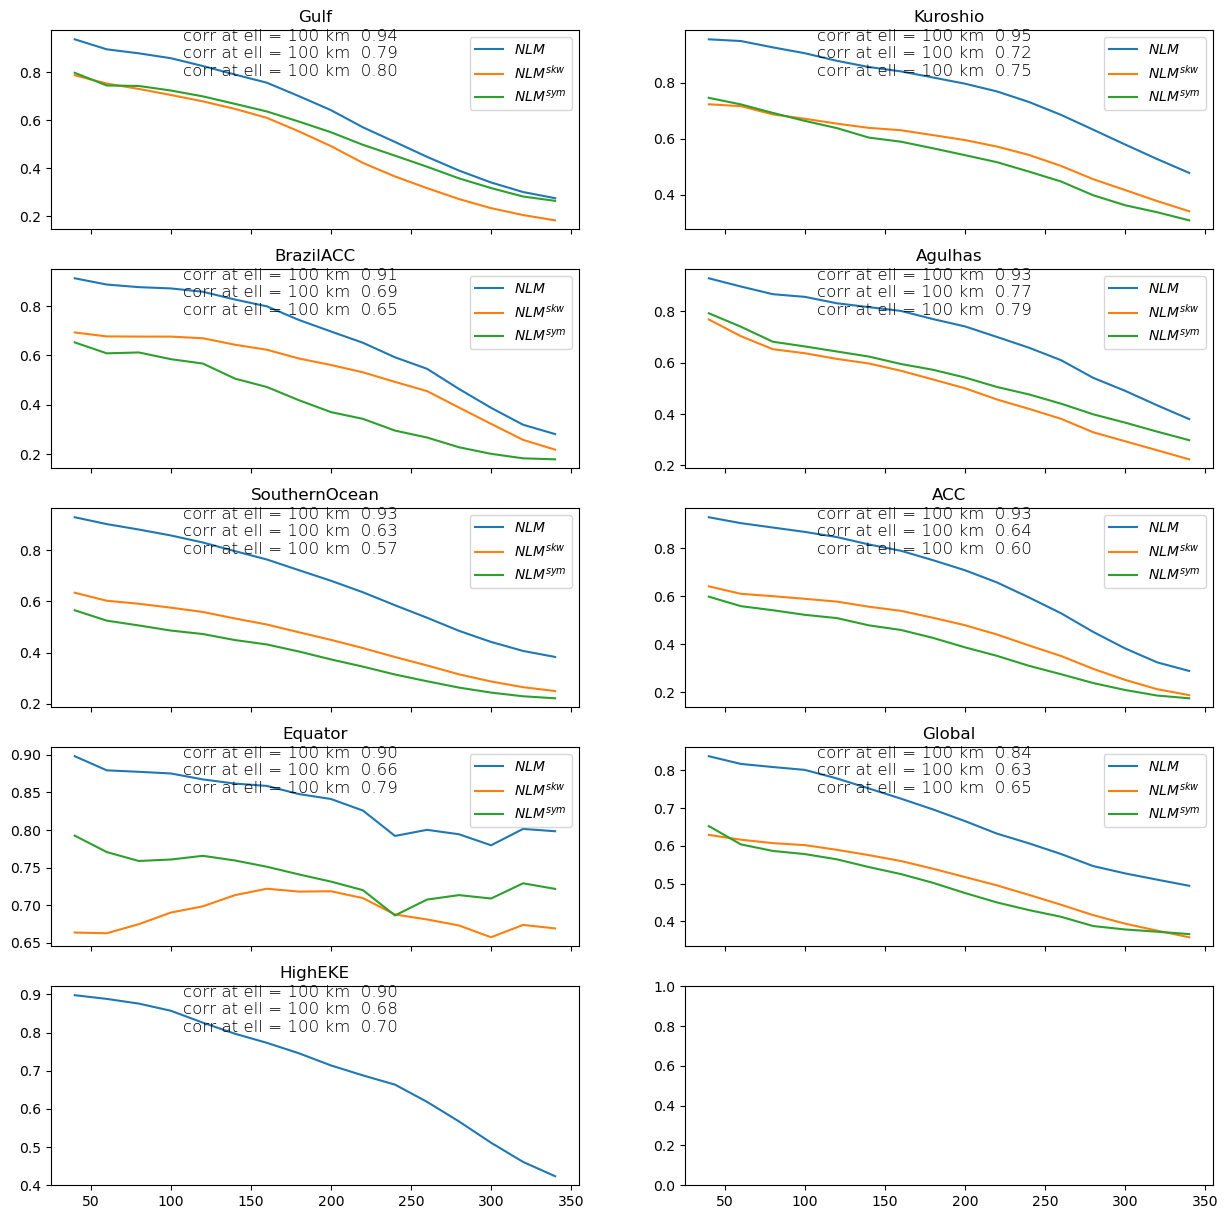

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(15, 15))

for i in range(9):
    ii = i//2
    jj = i%2
    idx = np.where(ell == 40)[0][0]
    maxCorr = np.max(corr_EPPA_NLMtot[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMtot[:,i])]
    #txt = 'max corr tot = {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    txt = 'corr at ell = 100 km {0:5.2f} \n'.format(corr_EPPA_NLMtot[idx,i])
    
    maxCorr = np.max(corr_EPPA_NLMrot[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMrot[:,i])]
    #txt2 = 'max corr skw= {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    txt2 = 'corr at ell = 100 km {0:5.2f} \n'.format(corr_EPPA_NLMrot[idx,i])
    
    maxCorr = np.max(corr_EPPA_NLMstr[:,i])
    maxCorrEll = ell[np.argmax(corr_EPPA_NLMstr[:,i])]
    #txt3 = 'max corr sym= {0:5.2f} at ell = {1:d} km\n'.format(maxCorr,maxCorrEll)
    txt3 = 'corr at ell = 100 km {0:5.2f} \n'.format(corr_EPPA_NLMstr[idx,i])
    
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMtot[:,i], label = r'$NLM$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMtot[:,i], label = 'NLM_timeAvg')
    ax[ii,jj].text(0.25, 0.67, txt + txt2 + txt3, horizontalalignment='left', fontweight = 'light', 
                    verticalalignment='bottom', transform=ax[ii,jj].transAxes, fontsize=12)

    ax[ii,jj].set_title(regions[i])
    
for i in range(8):
    ii = i//2
    jj = i%2
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMrot[:,i], label = r'$NLM^{skw}$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMrot[:,i], label = 'NLM_rot_timeAvg')
    
for i in range(8):
    ii = i//2
    jj = i%2
    ax[ii,jj].plot(ell[:], corr_EPPA_NLMstr[:,i], label = r'$NLM^{sym}$')
    #ax[ii,jj].plot(ell[:], corr_tAvg_EPPA_NLMstr[:,i], label = 'NLM_str_timeAvg')
    ax[ii,jj].legend()

In [ ]:
ell = np.array(ds2.variables['ell'])
rNLM_tot = np.array(ds2.variables['rNLM_tot'])
rNLM_rot = np.array(ds2.variables['rNLM_rot'])
rNLM_str = np.array(ds2.variables['rNLM_str'])

In [ ]:
idx = np.where(ell == 100)[0][0]
cmap = plt.get_cmap('jet').copy()
cmap.set_bad('k')
plt.pcolormesh(rNLM_tot[idx,:,:], cmap = cmap)#, vmin=-1, vmax=1)
plt.colorbar()